# Actividad dataset: análisis de la carga de baterías de vehículos eléctricos

**Nombre y apellidos:** Alexandre Carulla Rodes

**Asignatura**: Python para la Inteligencia Artificial (Máster en Inteligencia Artificial, VIU)

**Fecha de entrega:** 20/07/2025

**GitHub**: [acarulla-viu](https://github.com/acarulla-viu/Python_para_la_IA)

Importación de las librerías usadas.

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Datos de carga de batería de vehículos eléctricos

Se ha empleado un *dataset* de información de carga de vehículo eléctrico, donde aparecen datos relacionados con el estado de carga (SoC), el voltaje del paquete de batería, la corriente de carga, el voltaje máximo y mínimo de las celdas, la temperatura máxima y mínima del sistema, así como la energía y capacidad disponibles en cada momento del ciclo de carga.

Dichos datos se encuentran en [este repositorio de GitHub](https://github.com/BatICM/battery-charging-data-of-on-road-electric-vehicles/tree/main) y pertenecen al artículo:

> Deng Z, Xu L, Liu H, Hu X, Duan Z, Xu Y.  
> *Prognostics of battery capacity based on charging data and data-driven methods for on-road vehicles.*  
> Applied Energy. 2023; 339:120954.

Se ponen a disposición pública los datos de carga de los paquetes de batería de 20 vehículos eléctricos comerciales. Los vehículos son BAIC EU5, equipados con baterías CATL NCM (níquel, cobalto y manganeso). La capacidad nominal es de 145 Ah, y hay 90 celdas de batería conectadas en serie en el paquete de cada vehículo. 

![BAIC EU5](img/baic-eu5.jpg)

El *dataset* está constituido por 20 archivos CSV, cada uno contiene los datos instantáneos de cada ciclo de carga realizado (desde el momento en el que se empieza a cargar hasta que termina) de un coche en concreto. Dichos archivos están etiquetados como `#1.csv`, `#2.csv`, ..., `#20.csv`, donde el nombre indica el identificador de cada coche. El período de recopilación de datos abarca más de dos años, con aproximadamente 29 meses.

El objetivo consiste en estudiar los datos, limpiándolos, estructurándolos y analizándolos. También se pretende crear visualizaciones adecuadas de los elementos más importantes y realizar cálculos auxiliares en base a los datos disponibles para poder dar explicaciones y conclusiones más enriquecedoras. Asimismo, se busca simplificar los datos en tablas resumidas más generales y descriptivas, permitiendo hacer un manejo más sencillo y comprensible de los datos.

## Lectura de los datos

Se van a cargar todos los datos en memoria, ya que no son muy voluminosos y es posible manejarlos de esta manera.

Primero se ha desarrollado una función llamada `load_data` donde esencialmente se usa `pd.read_csv` para leer los datos de cada vehículo, que finalmente son concatenados a un mismo DataFrame mediante `pd.concat`.

In [8]:
def load_data(folder_path, N):
    """
    Se leen los archivos pertenecientes a cada vehículo.

    Entradas:
    - "folder_path": Ruta donde se encuentran los archivos a leer.
    - "N": Número de vehículos a leer.

    Salidas:
    - "df": DataFrame total con los datos de todos los vehículos leídos.
    """
    
    # Se revisa que el número de vehículos a leer es coherente con los archivos que hay
    if N > 20:
        N = 20
    elif N <= 0:
        N = 1
        
    df_aux = []
    # Se recorre cada uno de los archivos a leer
    for i in range(1, N + 1):
        file_name = f"#{i}.csv" 
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        print(f"Se ha leído satisfactoriamente el archivo {file_name}.")

        df["Vehicle"] = f"{i}" # Se añade una columna con el identificador de cada vehículo para distinguir correctamente los datos
        df_aux.append(df)

    df = pd.concat(df_aux, ignore_index=True) # Se concatenan los datos leídos de cada vehículo para tenerlo en un mismo DataFrame
    
    return df

In [9]:
path = "data" # Ruta a la carpeta donde se encuentran los archivos a leer
N = 5 # Número de vehículos cuyos datos se quiere leer

df = load_data(path, N)

Se ha leído satisfactoriamente el archivo #1.csv.
Se ha leído satisfactoriamente el archivo #2.csv.
Se ha leído satisfactoriamente el archivo #3.csv.
Se ha leído satisfactoriamente el archivo #4.csv.
Se ha leído satisfactoriamente el archivo #5.csv.


In [10]:
display(df)

,Unnamed: 0,record_time,soc,pack_voltage (V),charge_current (A),max_cell_voltage (V),min_cell_voltage (V),max_temperature (℃),min_temperature (℃),available_energy (kw),available_capacity (Ah),Vehicle
0,0,20190726200235,27.2,328.2,-52.20001,3.656,3.640,41,38,12.40,37.28,1
1,1,20190726200243,27.6,328.5,-52.20001,3.663,3.645,41,38,12.44,37.39,1
2,2,20190726200251,27.6,328.6,-52.20001,3.665,3.647,41,38,12.47,37.51,1
3,3,20190726200259,27.6,328.6,-52.20001,3.666,3.649,41,38,12.52,37.64,1
4,4,20190726200307,27.6,328.8,-52.20001,3.666,3.649,41,38,12.56,37.76,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4176040,832184,20211115174324,97.2,374.4,-41.60001,4.174,4.141,33,32,42.21,126.93,5
4176041,832185,20211115174334,97.2,374.6,-41.60001,4.176,4.142,33,32,42.25,127.04,5
4176042,832186,20211115174344,97.2,374.7,-41.60001,4.176,4.142,33,32,42.29,127.17,5
4176043,832187,20211115174354,97.6,374.7,-41.60001,4.177,4.144,33,32,42.33,127.29,5


Haciendo un breve resumen de los indicadores que se dispone:
- `record_time`: Instante de tiempo de la muestra.
- `soc`: Estado de la carga en porcentaje (State of Charge). El 100% significa que la batería está totalmente cargada.
- `pack_voltage (V)`: Tensión en voltios del conjunto de toda la batería.
- `charge_current (A)`: Intensidad en amperios de la carga de la batería.
- `max_cell_voltage (V)` y `min_cell_voltage (V)`: Tensión máxima y mínima en voltios de las celdas de la batería, respectivamente.
- `max_temperature (℃)` y `min_temperature (℃)`: Temperatura máxima y mínima en grados Celsius de las celdas de la batería, respectivamente.
- `available_energy (kw)`: Energía en kilovatios hora de la batería (hay una errata en la unidad del nombre de la columna).
- `available_capacity (Ah)`: Capacidad en amperios por hora de la batería.

## Procesado de los datos

Los datos ya han sido cargados mediante la función `load_data` y se encuentran en un DataFrame denominado `df`. Sin embargo, hay ciertos aspectos a pulir y mejorar en esta tabla antes de realizar cálculos o representaciones.

Primero, verificamos que no exista ninguna celda vacía o NaN en el *dataset* leído mediante `df.isna`.

In [15]:
df.isna().sum()

Unnamed: 0                 0
record_time                0
soc                        0
pack_voltage (V)           0
charge_current (A)         0
max_cell_voltage (V)       0
min_cell_voltage (V)       0
max_temperature (℃)        0
min_temperature (℃)        0
available_energy (kw)      0
available_capacity (Ah)    0
Vehicle                    0
dtype: int64

Como se puede observar, existe una columna llamada `Unnamed: 0`, esto es debido a que en los propios datos en crudo de cada archivo existe un identificador de cada muestra. Además, como en la cabecera del archivo no existe un nombre como tal para esa columna, automáticamente Pandas le pone ese nombre. Es evidente que, como ya tenemos los índices que genera el propio Pandas, no es necesario tener esta columna, por lo que es posible eliminarla mediante el método `drop`.

In [17]:
df = df.drop(df.columns[0], axis=1) # Se elimina la primera columna, que es la perteneciente a los índices numerados

In [18]:
display(df.head())

,record_time,soc,pack_voltage (V),charge_current (A),max_cell_voltage (V),min_cell_voltage (V),max_temperature (℃),min_temperature (℃),available_energy (kw),available_capacity (Ah),Vehicle
0,20190726200235,27.2,328.2,-52.20001,3.656,3.640,41,38,12.40,37.28,1
1,20190726200243,27.6,328.5,-52.20001,3.663,3.645,41,38,12.44,37.39,1
2,20190726200251,27.6,328.6,-52.20001,3.665,3.647,41,38,12.47,37.51,1
3,20190726200259,27.6,328.6,-52.20001,3.666,3.649,41,38,12.52,37.64,1
4,20190726200307,27.6,328.8,-52.20001,3.666,3.649,41,38,12.56,37.76,1


Los nombres de las columnas se han puesto según la cabecera que ya existe en cada archivo. Sin embargo, si queremos cambiar los nombres de las columnas para que sean más descriptivos, podemos usar el método `rename`. Para ello, se ha creado un diccionario donde la clave es el nombre anterior y el valor es el nombre nuevo.

In [20]:
cols_new = {
    "record_time": "Timestamp",
    "soc": "SoC (%)",
    "pack_voltage (V)": "Pack voltage (V)",
    "charge_current (A)": "Charge current (A)",
    "max_cell_voltage (V)": "Max. cell voltage (V)",
    "min_cell_voltage (V)": "Min. cell voltage (V)",
    "max_temperature (℃)": "Max. cell temperature (℃)",
    "min_temperature (℃)": "Min. cell temperature (℃)",
    "available_energy (kw)": "Available energy (kWh)",
    "available_capacity (Ah)": "Available capacity (Ah)"
}
df = df.rename(columns=cols_new)

In [21]:
display(df.head())

,Timestamp,SoC (%),Pack voltage (V),Charge current (A),Max. cell voltage (V),Min. cell voltage (V),Max. cell temperature (℃),Min. cell temperature (℃),Available energy (kWh),Available capacity (Ah),Vehicle
0,20190726200235,27.2,328.2,-52.20001,3.656,3.640,41,38,12.40,37.28,1
1,20190726200243,27.6,328.5,-52.20001,3.663,3.645,41,38,12.44,37.39,1
2,20190726200251,27.6,328.6,-52.20001,3.665,3.647,41,38,12.47,37.51,1
3,20190726200259,27.6,328.6,-52.20001,3.666,3.649,41,38,12.52,37.64,1
4,20190726200307,27.6,328.8,-52.20001,3.666,3.649,41,38,12.56,37.76,1


De forma cualitativa, se ha comprobado que el *dataset* contiene algunas muestras en las que en realidad no se está realizando carga, ya que la corriente (`Charge current (A)`) es exactamente cero en varios instantes. En concreto, hay ciertos ciclos de carga que contienen varias horas en las que inicialmente no se está inyectando corriente (y, por lo tanto, no se está cargando nada). Como esto puede dar problemas en el análisis (como el tiempo de carga), se va a excluir esos valores en los que el flujo de corriente es nulo, así nos ceñimos a tener en el DataFrame exclusivamente datos de cuando se está realizando la carga. Es importante mencionar que en este caso no es necesario usar el `np.isclose`, puesto que se tiene muy bien identificado que en los datos en crudo en este caso tienen un valor exactamente de `0.0`. Así pues, se actualiza el DataFrame `df` para quedarse solamente con los valores en los que `Charge current (A)` sea estrictamente diferente de `0.0`.

In [23]:
df = df[df["Charge current (A)"] != 0.0]

También, podemos notar que la corriente tiene siempre valores negativos, posiblemente por como está definido el sentido de la corriente en la sonda, ya que existen vehículos eléctricos que también pueden descargarse y en ese caso los valores de corriente serían positivos. Dado que en este *dataset* solo hay ciclos de carga, todos los valores de corriente serán negativos, por lo que, por simplicidad, se va a invertir su signo para tenerlos positivos.

In [25]:
df["Charge current (A)"] = -df["Charge current (A)"]

También se puede observar que el `Timestamp` está en un formato que no es claramente entendible de forma humana. Por lo tanto, se va a usar `pd.to_datetime` para transformarlo automáticamente a un formato de tipo `%Y%m%d%H%M%S`.

In [27]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%Y%m%d%H%M%S")

In [28]:
display(df.head())

,Timestamp,SoC (%),Pack voltage (V),Charge current (A),Max. cell voltage (V),Min. cell voltage (V),Max. cell temperature (℃),Min. cell temperature (℃),Available energy (kWh),Available capacity (Ah),Vehicle
0,2019-07-26 20:02:35,27.2,328.2,52.20001,3.656,3.640,41,38,12.40,37.28,1
1,2019-07-26 20:02:43,27.6,328.5,52.20001,3.663,3.645,41,38,12.44,37.39,1
2,2019-07-26 20:02:51,27.6,328.6,52.20001,3.665,3.647,41,38,12.47,37.51,1
3,2019-07-26 20:02:59,27.6,328.6,52.20001,3.666,3.649,41,38,12.52,37.64,1
4,2019-07-26 20:03:07,27.6,328.8,52.20001,3.666,3.649,41,38,12.56,37.76,1


## Estructuración de los datos según los vehículos

Una vez ya se ha hecho una limpieza y procesado de todos los datos a la vez, por sencillez, se va a crear un diccionario de DataFrames `df_v` para hacer una distinción de los datos de cada vehículo, así se tiene el sistema mejor distribuido y sin tener que manejar un solo DataFrame enorme. En resumen, para acceder a los datos de un vehículo `i` se realiza como `df_v["Vehicle i"]`.

In [31]:
vehicles = df['Vehicle'].unique()  # Se identifica los vehículos que se tiene

df_v = {}  # Diccionario vacío para guardar los DataFrames de cada vehículo

# Se recorre cada vehículo para poner sus datos en un DataFrame concreto
for i, vehicle in enumerate(vehicles, start=1):
    vehicle_key = f"Vehicle {i}"
    df_v[vehicle_key] = df[df["Vehicle"] == vehicle].reset_index(drop=True)

In [32]:
for i, vehicle in enumerate(vehicles, start=1):
    display(df_v[f"Vehicle {i}"].head())

,Timestamp,SoC (%),Pack voltage (V),Charge current (A),Max. cell voltage (V),Min. cell voltage (V),Max. cell temperature (℃),Min. cell temperature (℃),Available energy (kWh),Available capacity (Ah),Vehicle
0,2019-07-26 20:02:35,27.2,328.2,52.20001,3.656,3.640,41,38,12.40,37.28,1
1,2019-07-26 20:02:43,27.6,328.5,52.20001,3.663,3.645,41,38,12.44,37.39,1
2,2019-07-26 20:02:51,27.6,328.6,52.20001,3.665,3.647,41,38,12.47,37.51,1
3,2019-07-26 20:02:59,27.6,328.6,52.20001,3.666,3.649,41,38,12.52,37.64,1
4,2019-07-26 20:03:07,27.6,328.8,52.20001,3.666,3.649,41,38,12.56,37.76,1


,Timestamp,SoC (%),Pack voltage (V),Charge current (A),Max. cell voltage (V),Min. cell voltage (V),Max. cell temperature (℃),Min. cell temperature (℃),Available energy (kWh),Available capacity (Ah),Vehicle
0,2019-07-25 15:14:34,49.6,336.8,70.39999,3.764,3.732,39,37,22.38,67.29,2
1,2019-07-25 15:14:42,49.6,337.2,70.50000,3.768,3.737,39,37,22.44,67.46,2
2,2019-07-25 15:14:50,49.6,337.5,70.39999,3.770,3.739,39,37,22.49,67.63,2
3,2019-07-25 15:14:58,49.6,337.8,70.50000,3.773,3.742,39,37,22.55,67.79,2
4,2019-07-25 15:15:06,50.0,338.0,70.39999,3.776,3.744,39,38,22.61,67.96,2


,Timestamp,SoC (%),Pack voltage (V),Charge current (A),Max. cell voltage (V),Min. cell voltage (V),Max. cell temperature (℃),Min. cell temperature (℃),Available energy (kWh),Available capacity (Ah),Vehicle
0,2019-07-26 19:08:05,5.2,316.1,8.200012,3.518,3.502,39,38,2.27,6.82,3
1,2019-07-26 19:08:13,5.2,317.5,45.000000,3.543,3.521,39,38,2.29,6.90,3
2,2019-07-26 19:08:21,5.2,317.7,45.000000,3.546,3.523,39,38,2.32,7.00,3
3,2019-07-26 19:08:29,5.2,318.0,45.000000,3.548,3.526,39,38,2.36,7.11,3
4,2019-07-26 19:08:37,5.2,318.1,45.000000,3.549,3.527,39,38,2.40,7.21,3


,Timestamp,SoC (%),Pack voltage (V),Charge current (A),Max. cell voltage (V),Min. cell voltage (V),Max. cell temperature (℃),Min. cell temperature (℃),Available energy (kWh),Available capacity (Ah),Vehicle
0,2019-07-25 15:58:38,13.2,323.6,71.70001,3.615,3.591,36,35,6.03,18.13,4
1,2019-07-25 15:58:46,13.6,324.1,71.80002,3.620,3.595,36,35,6.08,18.29,4
2,2019-07-25 15:58:54,13.6,324.2,71.70001,3.623,3.598,36,35,6.14,18.46,4
3,2019-07-25 15:59:02,13.6,324.6,71.70001,3.625,3.600,36,35,6.19,18.61,4
4,2019-07-25 15:59:10,14.0,324.7,71.70001,3.626,3.602,36,35,6.24,18.78,4


,Timestamp,SoC (%),Pack voltage (V),Charge current (A),Max. cell voltage (V),Min. cell voltage (V),Max. cell temperature (℃),Min. cell temperature (℃),Available energy (kWh),Available capacity (Ah),Vehicle
0,2019-07-26 00:22:51,10.8,321.4,41.20001,3.578,3.564,36,34,4.84,14.56,5
1,2019-07-26 00:22:59,10.8,321.7,44.60001,3.584,3.569,36,34,4.88,14.66,5
2,2019-07-26 00:23:07,10.8,321.9,44.60001,3.586,3.571,36,34,4.90,14.76,5
3,2019-07-26 00:23:15,10.8,322.2,44.60001,3.588,3.572,36,34,4.95,14.87,5
4,2019-07-26 00:23:23,11.2,322.2,44.60001,3.588,3.573,36,34,4.98,14.97,5


Ahora, una vez ya tenemos segmentados los ciclos de cada vehículo, podemos categorizar a qué ciclo pertenece cada instante, ya que no existe ninguna variable que nos indique cuándo ha terminado un ciclo, simplemente los datos se encuentran amontonados, y la última muestra del final de un ciclo es totalmente adyacente a la primera del inicio del siguiente ciclo.

Para ello, vamos a basarnos en el criterio de que, si ha pasado más de una hora entre una muestra y otra, significa que es porque se está realizando un nuevo ciclo de carga (ya que, cuando se está cargando, por lo general, hay una diferencia de pocos segundos entre muestra y muestra). Para ello, se usa `diff().dt.total_seconds()` para el cálculo de la diferencia entre dos filas sucesivas en segundos, y `cumsum` para determinar el número de ciclo en el que se está en cada muestra.

In [34]:
for df_v_current in df_v.values():
    diff_secs = df_v_current["Timestamp"].diff().dt.total_seconds() # Se almacena la diferencia de tiempo entre cada muestra
    
    # Si ha pasado más de una hora entre una muestra y otra se asume que es porque se está realizando una nueva carga
    new_cycle = (diff_secs > 3600)
    df_v_current["Cycle"] = new_cycle.cumsum() + 1

In [35]:
df_v["Vehicle 1"]

,Timestamp,SoC (%),Pack voltage (V),Charge current (A),Max. cell voltage (V),Min. cell voltage (V),Max. cell temperature (℃),Min. cell temperature (℃),Available energy (kWh),Available capacity (Ah),Vehicle,Cycle
0,2019-07-26 20:02:35,27.200000,328.20000,52.200010,3.656,3.640,41,38,12.400000,37.280000,1,1
1,2019-07-26 20:02:43,27.600000,328.50000,52.200010,3.663,3.645,41,38,12.440000,37.390000,1,1
2,2019-07-26 20:02:51,27.600000,328.60000,52.200010,3.665,3.647,41,38,12.470000,37.510000,1,1
3,2019-07-26 20:02:59,27.600000,328.60000,52.200010,3.666,3.649,41,38,12.520000,37.640000,1,1
4,2019-07-26 20:03:07,27.600000,328.80000,52.200010,3.666,3.649,41,38,12.560000,37.760000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
843228,2021-11-15 16:46:08,94.800000,371.90000,41.899994,4.147,4.114,34,33,41.170000,123.780000,1,1573
843229,2021-11-15 16:46:16,94.800000,372.10000,41.800020,4.147,4.114,34,33,41.200000,123.890000,1,1573
843230,2021-11-15 16:46:24,94.800000,372.10000,41.800020,4.148,4.114,34,33,41.239998,124.000000,1,1573
843231,2021-11-15 16:46:32,95.200005,372.10000,41.800020,4.149,4.115,34,33,41.270000,124.090000,1,1573


## Estructuración de los datos según los ciclos de carga

Para jerarquizar aún más los datos, se va a crear un diccionario de DataFrames para hacer una distinción de los ciclos de los datos de cada vehículo. Del mismo modo que se ha creado un diccionario para estructurar los datos de cada vehículo, se puede seguir la misma filosofía jerárquica y construir un diccionario bidimensional `df_v_c`, de manera que para acceder a los datos de un vehículo `i` con ciclo `j` sea como `df_v_c["Vehicle i"]["Cycle j"]`.

In [38]:
df_v_c = {} # Diccionario vacío para guardar los DataFrames de cada vehículo con sus ciclos segmentados en otra dimensión

# Se recorren los vehículos para añadirle los ciclos
for vehicle_key, df_current in df_v.items():
    cycles = df_current["Cycle"].unique() # Se identifica los ciclos que se tiene con este vehículo
    df_v_c[vehicle_key] = {f"Cycle {cycle}": df_current[df_current["Cycle"] == cycle].reset_index(drop=True) for cycle in cycles}

In [39]:
df_v_c["Vehicle 1"]["Cycle 1"]

,Timestamp,SoC (%),Pack voltage (V),Charge current (A),Max. cell voltage (V),Min. cell voltage (V),Max. cell temperature (℃),Min. cell temperature (℃),Available energy (kWh),Available capacity (Ah),Vehicle,Cycle
0,2019-07-26 20:02:35,27.2,328.2,52.20001,3.656,3.640,41,38,12.40,37.28,1,1
1,2019-07-26 20:02:43,27.6,328.5,52.20001,3.663,3.645,41,38,12.44,37.39,1,1
2,2019-07-26 20:02:51,27.6,328.6,52.20001,3.665,3.647,41,38,12.47,37.51,1,1
3,2019-07-26 20:02:59,27.6,328.6,52.20001,3.666,3.649,41,38,12.52,37.64,1,1
4,2019-07-26 20:03:07,27.6,328.8,52.20001,3.666,3.649,41,38,12.56,37.76,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
919,2019-07-26 22:05:01,99.6,380.8,14.70001,4.239,4.226,44,41,45.02,135.34,1,1
920,2019-07-26 22:05:09,99.6,380.8,14.70001,4.239,4.227,44,41,45.02,135.34,1,1
921,2019-07-26 22:05:17,99.6,380.8,14.70001,4.240,4.227,44,41,45.02,135.34,1,1
922,2019-07-26 22:05:25,99.6,381.0,14.70001,4.240,4.227,44,41,45.02,135.34,1,1


Nótese que, ahora, por como está estructurado internamente `df_v_c`, las columnas `Vehicle` y `Cycle` son redundantes, ya que ya vienen dados en la propia clave del diccionario `df_v_c["Vehicle i"]["Cycle j"]`. Se podrían borrar.

## Visualización de resultados de ciclos de carga

Es muy difícil visualizar todos estos datos en crudo, por lo que es posible hacer diferentes representaciones. Por ejemplo, se puede ver en una misma vista la evolución de la tensión y corriente de un mismo ciclo, o el SoC y la capacidad.

También, para generar visualizaciones que no estaban en los propios datos, es posible crear nuevas magnitudes calculadas. A partir de la tensión $V$ y la corriente $I$ es posible calcular la potencia instantánea $P$ en cada instante de tiempo $t$ de un ciclo en concreto.

$$P(t) = V(t)\cdot I(t)$$

Por ejemplo, vamos a realizar dicha visualización con `Vehicle 1` y `Cycle 1`.

In [44]:
df_v_c["Vehicle 1"]["Cycle 1"]["Power (W)"] = df_v_c["Vehicle 1"]["Cycle 1"]["Pack voltage (V)"] * df_v_c["Vehicle 1"]["Cycle 1"]["Charge current (A)"]

Los gráficos de un mismo ciclo podemos ponerlos juntos, para poder visualizarlos mejor, ya que comparten el mismo eje de abscisas (la marca temporal). Para que las representaciones se vean de la mejor manera posible, se va a emplear `plt.subplots`, de manera que cada representación esté dispuesta en una misma columna, y algunos compartiendo caja de representación pero con ejes distintos.

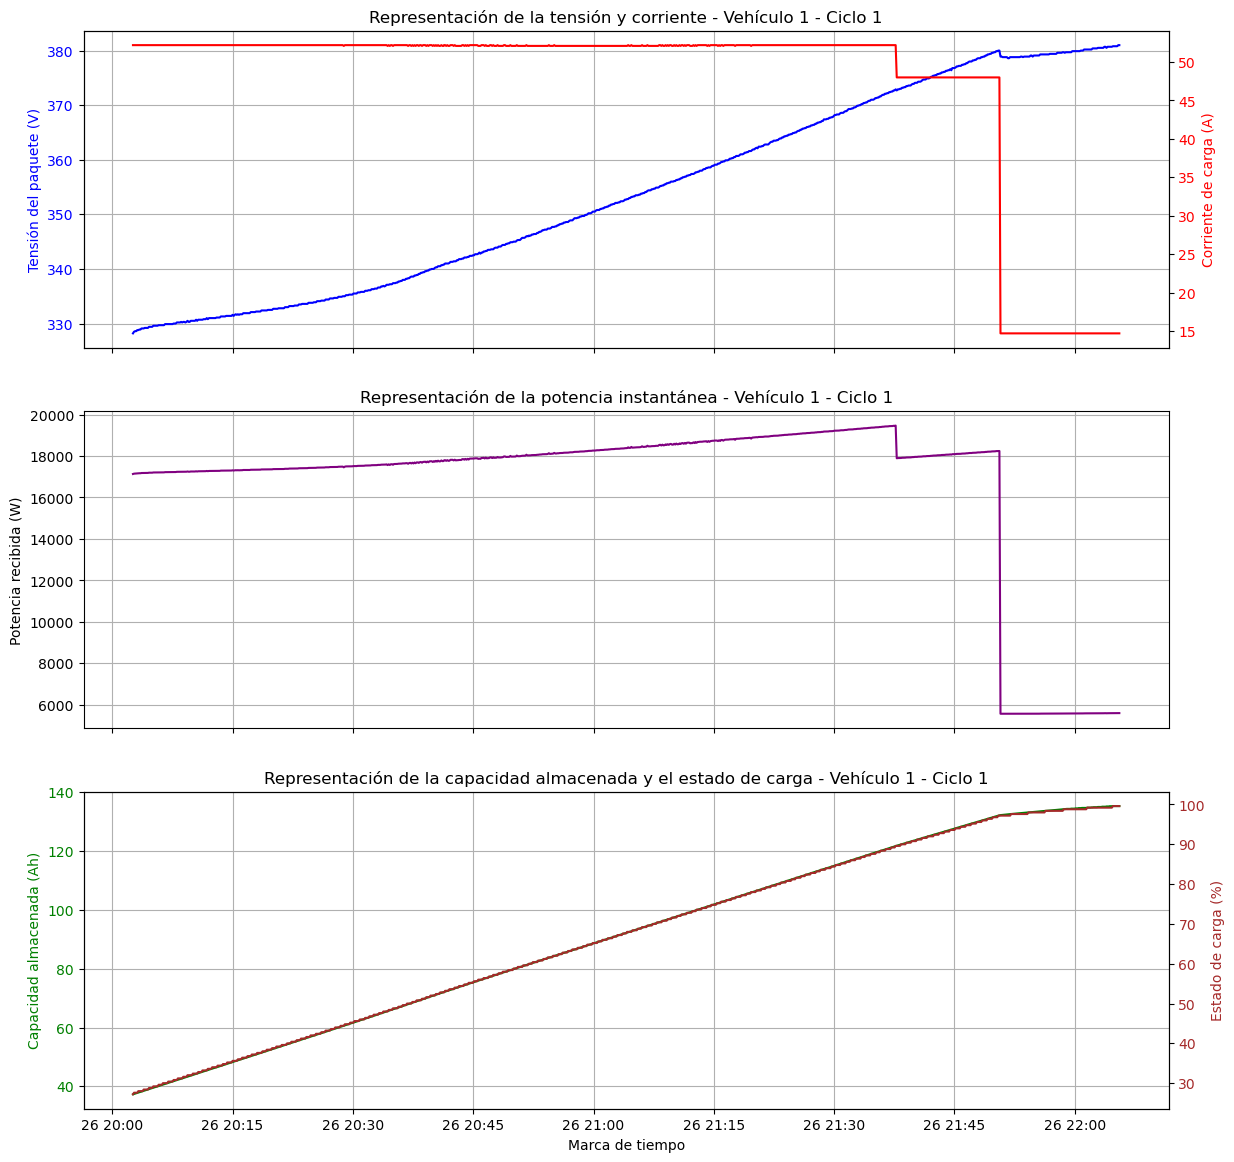

In [46]:
fig, axs = plt.subplots(3, 1, figsize=(14, 14), sharex=True) # Representación 3x1 y con el eje de abscisas compartido

# Subplot 1
ax1 = axs[0]
ax1a = ax1.twinx()
ax1.plot(df_v_c["Vehicle 1"]["Cycle 1"]["Timestamp"], df_v_c["Vehicle 1"]["Cycle 1"]["Pack voltage (V)"], color="blue")
ax1.set_ylabel("Tensión del paquete (V)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1a.plot(df_v_c["Vehicle 1"]["Cycle 1"]["Timestamp"], df_v_c["Vehicle 1"]["Cycle 1"]["Charge current (A)"], color="red")
ax1a.set_ylabel("Corriente de carga (A)", color="red")
ax1a.tick_params(axis="y", labelcolor="red")
ax1.set_title("Representación de la tensión y corriente - Vehículo 1 - Ciclo 1")
ax1.grid()

# Subplot 2
axs[1].plot(df_v_c["Vehicle 1"]["Cycle 1"]["Timestamp"], df_v_c["Vehicle 1"]["Cycle 1"]["Power (W)"], color="purple")
axs[1].set_ylabel("Potencia recibida (W)")
axs[1].set_title("Representación de la potencia instantánea - Vehículo 1 - Ciclo 1")
axs[1].grid()

# Subplot 3
ax3 = axs[2]
ax3a = ax3.twinx()
ax3.plot(df_v_c["Vehicle 1"]["Cycle 1"]["Timestamp"], df_v_c["Vehicle 1"]["Cycle 1"]["Available capacity (Ah)"], color="green")
ax3.set_ylabel("Capacidad almacenada (Ah)", color="green")
ax3.tick_params(axis="y", labelcolor="green")
ax3a.plot(df_v_c["Vehicle 1"]["Cycle 1"]["Timestamp"], df_v_c["Vehicle 1"]["Cycle 1"]["SoC (%)"], color="brown")
ax3a.set_ylabel("Estado de carga (%)", color="brown")
ax3a.tick_params(axis="y", labelcolor="brown")
ax3.set_title("Representación de la capacidad almacenada y el estado de carga - Vehículo 1 - Ciclo 1")
ax3.grid()

axs[2].set_xlabel("Marca de tiempo") # Eje de abscisas común

plt.show()

Observando la representación de la tensión y corriente, se puede ver que la carga se realiza con consignas de corriente constante por escalones. Lógicamente, existen otros modos de carga, que dependen fundamentalmente del coche (en concreto, el BMS, *Battery Management System*).

Esta gráfica es bastante ilustrativa para entender esta forma de carga ([*Fast charging for electric vehicles applications: Numerical optimization of a multi-stage charging protocol for lithium-ion battery and impact on cycle life*](https://www.sciencedirect.com/science/article/abs/pii/S2352152X21004850)).

![Gráfica carga con pasos de corriente constante](img/CC.jpg)

Por otro lado, en la última gráfica representada se puede ver la evolución del SoC y de la capacidad almacenada en la batería. Dado que ambos son proporcionales, siguen la misma tendencia, aunque se puede notar que el estado de carga da saltos en escalón, probablemente porque su valor tarda más tiempo en actualizarse o porque no tiene mucha resolución. En esencia, se puede ver que ambas magnitudes siguen una línea recta, aunque en el tramo final la pendiente es más baja, ya que, por seguridad, se reduce la potencia y se carga más lentamente.

## Resumen de los ciclos de cada vehículo

Dado que tener todos los datos de cada ciclo para cada vehículo es bastante tedioso, es posible construir un nuevo DataFrame `df_v_summ` que haga un resumen de las características más relevantes de cada ciclo de cada vehículo. 

Las magnitudes de resumen de cada ciclo son:
- `Timestamp start`: Marca de tiempo del inicio de la carga.
- `Timestamp end`: Marca de tiempo de la finalización de la carga.
- `Charging time (min)`: Duración de la carga en minutos
- `Start SoC (%)`: SoC en porcentaje al inicio de la carga.
- `Final SoC (%)`: SoC en porcentaje a la finalización de la carga.
- `Max. pack voltage (V)`: Tensión máxima del paquete en voltios durante la carga.
- `Average cell temperature (℃)`: Temperatura media de las celdas en Celsius durante la carga.
- `Energy consumed (kWh)`: Energía consumida en kilovatios hora durante la carga.
- `Start capacity (Ah)`: Capacidad de la batería al inicio de la carga.
- `Final capacity (Ah)`: Capacidad de la batería a la finalización de la carga.
- `Electricity cost (€)`: Coste eléctrico de la electricidad consumida debido a la carga.

In [50]:
electricity_rate = 0.15  # Coste de la electricidad (€/kWh)

df_v_summ = {} # Diccionario vacío para guardar en DataFrames los resúmenes de cada vehículo con sus ciclos

# Se recorre cada vehículo y sus ciclos
for vehicle, df_v_c_current in df_v_c.items():
    summary = []

    for df_cycle in df_v_c_current.values():
        charging_time = (df_cycle["Timestamp"].iloc[-1] - df_cycle["Timestamp"].iloc[0]).total_seconds() / 60 # Duración de la carga
        start_soc = df_cycle["SoC (%)"].iloc[0] # SoC al inicio de la carga
        final_soc = df_cycle["SoC (%)"].iloc[-1] # SoC al finalizar la carga
        max_pack_voltage = df_cycle["Pack voltage (V)"].max() # Tensión máxima del paquete durante la carga
        avg_max_temp = df_cycle["Max. cell temperature (℃)"].mean() # Temperatura promedio de la temperatura máxima de las celdas durante la carga
        avg_min_temp = df_cycle["Min. cell temperature (℃)"].mean() # Temperatura promedio de la temperatura mínima de las celdas durante la carga
        avg_temperature = np.mean([avg_max_temp, avg_min_temp]) # Temperatura media de las celdas durante la carga
        energy_consumed = df_cycle["Available energy (kWh)"].iloc[-1] - df_cycle["Available energy (kWh)"].iloc[0] # Energía consumida durante la carga
        start_capacity = df_cycle["Available capacity (Ah)"].iloc[0] # Capacidad de la batería al inicio de la carga
        final_capacity = df_cycle["Available capacity (Ah)"].iloc[-1] # Capacidad de la batería al finalizar la carga
        electricity_cost = energy_consumed * electricity_rate # Coste económico de la electricidad consumida del ciclo de carga

        summary.append({
            "Timestamp start": df_cycle["Timestamp"].iloc[0],
            "Timestamp end": df_cycle["Timestamp"].iloc[-1],
            "Charging time (min)": charging_time,
            "Start SoC (%)": start_soc,
            "Final SoC (%)": final_soc,
            "Max. pack voltage (V)": max_pack_voltage,
            "Average cell temperature (℃)": avg_temperature,
            "Energy consumed (kWh)": energy_consumed,
            "Start capacity (Ah)": start_capacity,
            "Final capacity (Ah)": final_capacity,
            "Electricity cost (€)": electricity_cost
        })

    df_v_summ[vehicle] = pd.DataFrame(summary) # Se pone todo en un DataFrame

In [51]:
display(df_v_summ["Vehicle 1"].head())

,Timestamp start,Timestamp end,Charging time (min),Start SoC (%),Final SoC (%),Max. pack voltage (V),Average cell temperature (℃),Energy consumed (kWh),Start capacity (Ah),Final capacity (Ah),Electricity cost (€)
0,2019-07-26 20:02:35,2019-07-26 22:05:33,122.966667,27.2,99.6,381.0,42.056818,32.62,37.28,135.34000,4.8930
1,2019-07-27 04:06:56,2019-07-27 05:47:16,100.333333,30.0,99.6,381.8,40.555113,31.38,41.01,135.34000,4.7070
2,2019-07-28 17:25:00,2019-07-28 18:54:06,89.100000,39.6,99.6,381.8,37.808846,27.04,54.07,135.34000,4.0560
3,2019-07-29 12:53:17,2019-07-29 14:39:13,105.933333,26.8,86.4,369.4,37.762264,26.94,36.38,117.39000,4.0410
4,2019-07-29 22:20:45,2019-07-29 23:55:28,94.716667,18.8,65.6,350.2,33.801543,21.05,25.79,89.07999,3.1575


## Visualización de los resúmenes de los ciclos

El hecho de tener este DataFrame de resumen de los ciclos de cada vehículo da mucho poder para realizar cálculos generales de forma sencilla.

Por ejemplo, es posible calcular cuál ha sido el coste económico total de electricidad debido a las cargas de cada uno de los coches (asumiendo una tarifa fija del precio del kilovatio hora y que la energía almacenada es la misma que la consumida, lo cual en la práctica no es cierto). Para obtener el resultado total hay que sumar los valores del coste de cada ciclo de cada vehículo mediante `df_v_summ.sum`.

In [54]:
total_costs = {vehicle: df["Electricity cost (€)"].sum() for vehicle, df in df_v_summ.items()}
for vehicle, cost in total_costs.items():
    print(f"Coste total de la electricidad de {vehicle}: {cost:.2f}€")

Coste total de la electricidad de Vehicle 1: 5856.39€
Coste total de la electricidad de Vehicle 2: 5852.34€
Coste total de la electricidad de Vehicle 3: 5665.19€
Coste total de la electricidad de Vehicle 4: 5811.36€
Coste total de la electricidad de Vehicle 5: 5723.21€


También se puede representar la evolución de la temperatura media de las celdas en cada carga para un mismo vehículo, que lógicamente dependerá mucho de la temperatura ambiente.

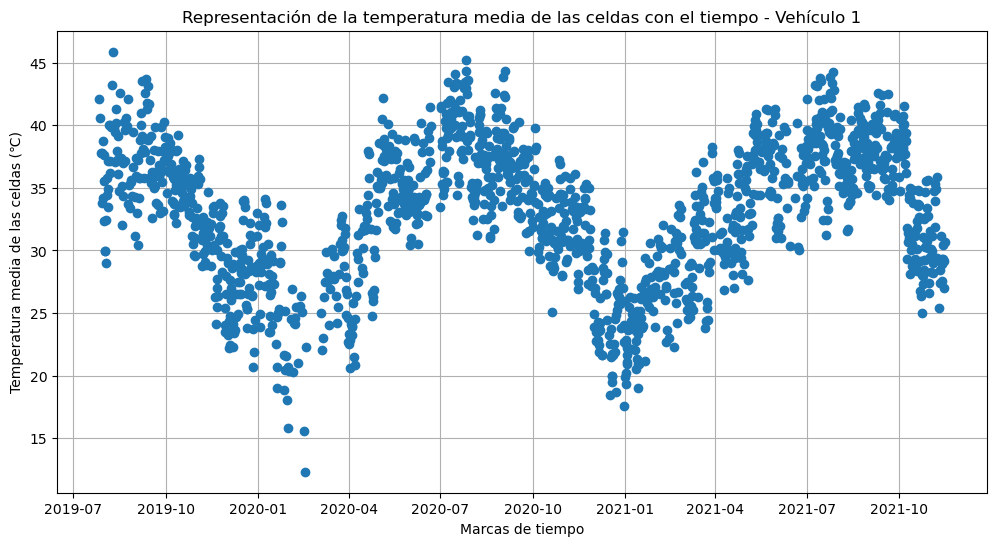

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(df_v_summ["Vehicle 1"]["Timestamp end"], df_v_summ["Vehicle 1"]["Average cell temperature (℃)"], marker="o", linestyle="None")
plt.xlabel("Marcas de tiempo")
plt.ylabel("Temperatura media de las celdas (℃)")
plt.title("Representación de la temperatura media de las celdas con el tiempo - Vehículo 1")
plt.grid()
plt.show()

Se puede ver claramente que la estacionalidad influye mucho en la temperatura de las celdas, lo cual puede repercutir en el rendimiento de las baterías y de la carga.

Por otro lado, es posible hacer una representación de la matriz de dispersión mediante `sns.pairplot` de las variables del resumen de los ciclos que nos parezca más interesantes de analizar.

C:\Users\alexc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alexc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alexc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alexc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

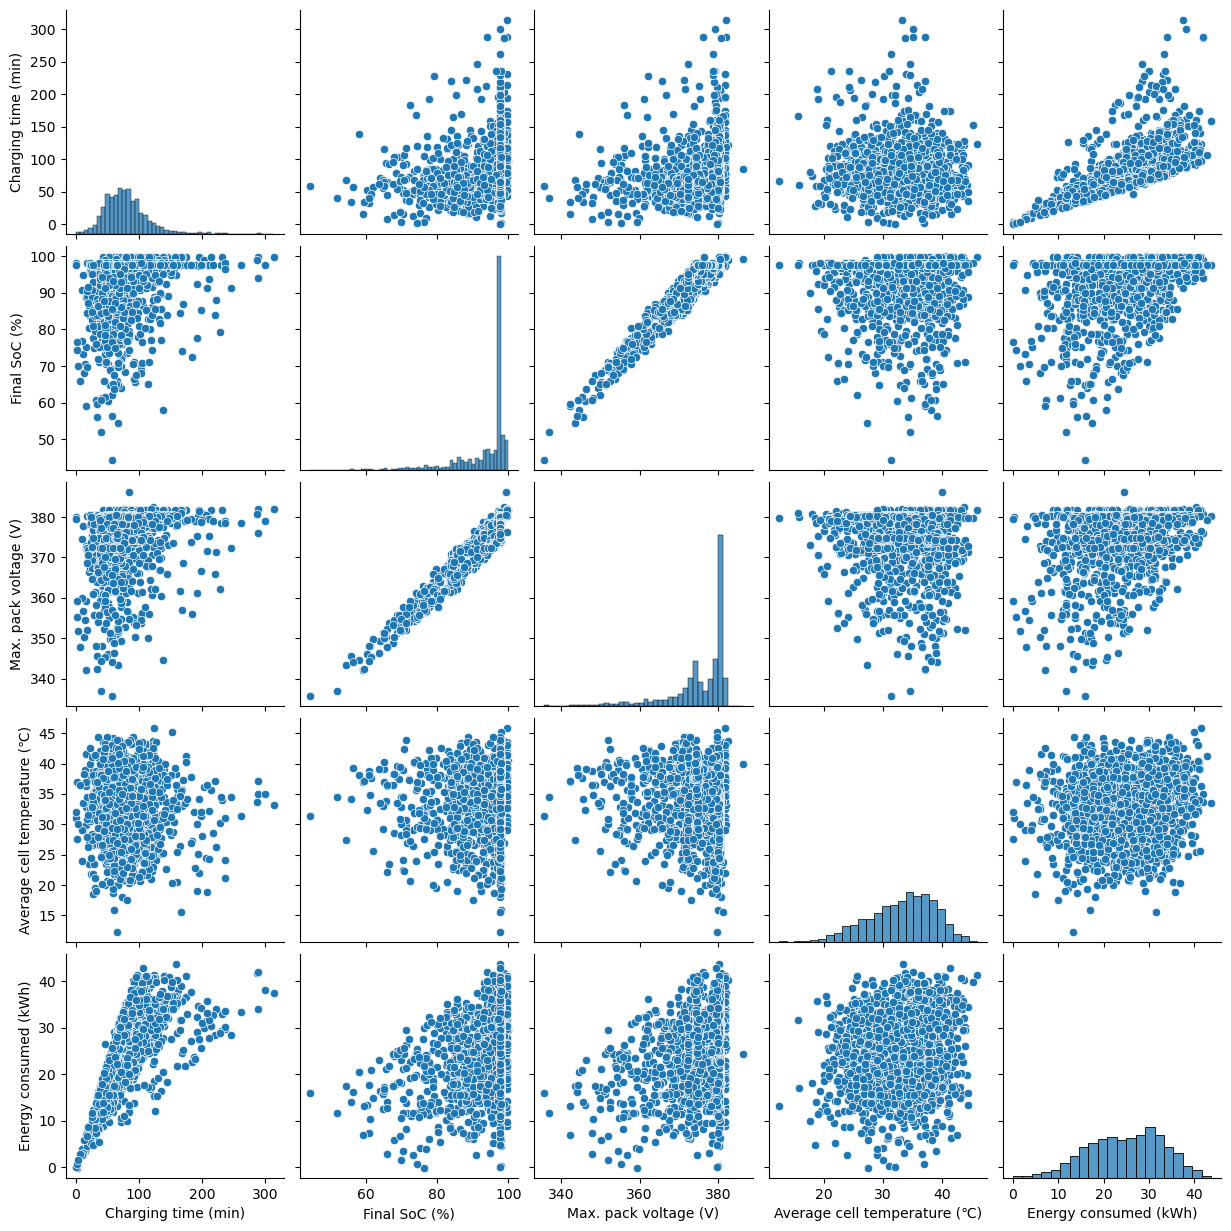

In [59]:
vars_pairplot = [
    "Charging time (min)",
    "Final SoC (%)",
    "Max. pack voltage (V)",
    "Average cell temperature (℃)",
    "Energy consumed (kWh)",
]

sns.pairplot(df_v_summ["Vehicle 1"][vars_pairplot])
plt.show()

Con este análisis, se puede ver cuál es la relación de cada variable con el resto. Por ejemplo, se puede notar una tendencia lineal entre el SoC al terminar la carga con el voltaje máximo alcanzado, lo cual es lógico, ya que cuanto más se ha cargado la batería mayor es la tensión del paquete. Por otro lado, hay otras variables que no parecen tener un patrón concreto, como la temperatura media de las celdas y la energía consumida, aunque sí parece que hay una determinada región de acumulación de los puntos.

Otro aspecto interesante a estudiar es la evolución de la capacidad máxima que soporta el vehículo con el paso del tiempo, puesto que teóricamente la batería debería ir degradándose y reducir su capacidad. Dado que no todos los ciclos de carga se cargan con SoC hasta el 100%, se va a realizar una linealización para estimar la capacidad cuando el SoC es 100%. Por lo tanto, sea $x_1$ el SoC (%) al inicio de la carga, $y_1$ la capacidad (Ah) al inicio de la carga, $x_2$ el SoC (%) al finalizar la carga e $y_2$ la capacidad (Ah) al finalizar la carga. Entonces, asumiendo que la dependencia es lineal, se puede estimar la capacidad $y$ cuando el SoC tiene un valor $x$ durante un mismo ciclo de carga.
$$ y - y_1 = m (x - x_1) $$
$$ m = \frac{y_2-y_1}{x_2-x_1} $$

Nosotros queremos estimar cuánto vale la capacidad $y$ del coche cuando el SoC es el 100% ($x=100$), ya que en ese momento la batería ha recibido toda la carga posible y ahí podemos saber cuál es la capacidad máxima (teórica) que puede almacenar en ese momento.

In [63]:
# Se recorre cada coche para añadir la columna del SoC
for df_v_summ_current in df_v_summ.values():
    theoretical_soc = (
        (df_v_summ_current["Final capacity (Ah)"] - df_v_summ_current["Start capacity (Ah)"]) /
        (df_v_summ_current["Final SoC (%)"] - df_v_summ_current["Start SoC (%)"])
    ) * (100 - df_v_summ_current["Start SoC (%)"]) + df_v_summ_current["Start capacity (Ah)"]
    
    df_v_summ_current["Theoretical capacity (Ah)"] = theoretical_soc

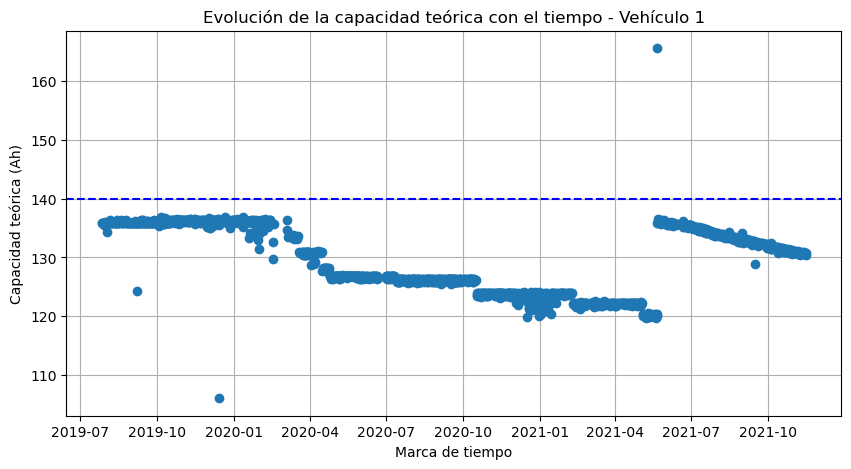

In [64]:
plt.figure(figsize=(10, 5))
plt.plot(df_v_summ["Vehicle 1"]["Timestamp end"], df_v_summ["Vehicle 1"]["Theoretical capacity (Ah)"], marker="o", linestyle="None")
plt.title("Evolución de la capacidad teórica con el tiempo - Vehículo 1")
plt.xlabel("Marca de tiempo")
plt.ylabel("Capacidad teórica (Ah)")
plt.grid()

plt.axhline(y=140, color='blue', linestyle='--') # Línea horizontal para señalizar la capacidad nominal

plt.show()

Se puede observar que poco a poco la batería se va degradando, lo cual causa que la capacidad total cuando la batería está cargada al 100% sea más baja. Aun así, es sorprendente que aproximadamente a partir de mediados del 2021 la capacidad del coche subiese repentinamente, prácticamente a su valor nominal, por lo que es muy probable que en ese momento la batería se cambiase o se le hiciese alguna modificación. Este fenómeno observado ocurre con todos los coches.

## Conclusiones

Se ha podido leer satisfactoriamente los datos de los archivos, teniendo del orden de millones de muestras por cada vehículo. Los datos se han podido procesar en tiempos razonablemente pequeños (unos pocos segundos). Con un procesado de los datos adecuado, se ha logrado modificar, transformar y formatear los datos en crudo de los que se disponía. No se han observado valores faltantes o NaN en el *dataset*.

Debido a la naturaleza acumulada de los datos, se ha optado por realizar una estructuración en diccionarios de DataFrames los datos de cada uno de los coches y sus respectivos ciclos, pudiendo acceder a los datos de una forma mucho más sencilla, organizada y generalizable. También, se han realizado representaciones de dichos datos, como también la construcción de nuevas magnitudes como la potencia recibida. Dichas representaciones han permitido identificar que las cargas se realizan con consignas de corriente constante por tramos, y también que la evolución del estado de carga durante un mismo ciclo es aproximadamente lineal, aunque cerca de la carga completa se aplana ligeramente.

Para extraer resultados más generales, se ha optado para crear un nuevo DataFrame con los valores resumidos de cada ciclo de cada vehículo. Con esto, se ha logrado una nueva tabla más pequeña y con los resultados relevantes de cada ciclo para realizar un análisis de estos. Se ha visto que el número de ciclos hechos es del orden de los miles, y que el coste acumulado de la electricidad de cada coche debido a la carga de la batería supera los 5000€. También se ha observado una estacionalidad de la temperatura media de la batería, teniendo, por lo tanto, una fuerte influencia con la temperatura ambiente. Además, con el fin de analizar con más profundidad las variables resumidas de los ciclos, se ha realizado una matriz de dispersión, observando una fuerte correlación entre el estado de carga final y la tensión máxima del paquete de la batería. 

Por último, se ha intentado observar la degradación de la batería con el paso del tiempo y uso del vehículo. Para ello, se ha hecho una estimación de la capacidad cuando el estado de carga es el 100%. Se ha podido observar un descenso progresivo de la capacidad con el transcurso del tiempo, aunque en un cierto instante dicha capacidad vuelve a subir muy cerca del valor nominal de la batería. No se le ha podido encontrar una explicación clara a dicho ascenso, pero probablemente se deba a un cambio o reparación de la batería.